# MSDS692 Project: Data Preprocessing and EDA - Car Accidents, Denver, CO
## Natalia Weakly    

#### Original data source: https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-accidents 

In [2]:
# Imports
import pandas as pd
import numpy as np
import datetime
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
accidents=pd.read_csv('../MSDSProject/traffic_accidents2.csv', parse_dates=True, low_memory=False)

The Denver Police Department dataset downloaded from https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-accidents includes the accidents that happened within the City and County of Denver limits as reported in accordance with the National Incident-Based Reporting System (NIBRS). It is important to note the following:
- The data set includes information about the accidents that happened during the past five calendar years plus the current year to date. 
- The data set includes only information about the accidents that had reported damage $1,000.00 and more, resulted in injury or fatality, and/or drugs or alcohol were involved. 
- The dataset is dynamic, as the system allows continuous additions, deletions, and modifications at any time with the goal of reporting the most accurate information up to date. As a result of the continuous data entry, the number of accidents even for past periods may change. 
- The data set contains both information as reported by third parties and the data confirmed through investigations by the Denver PD. The data becomes more accurate over time. It usually becomes more reliable about 30 days past an incident date.
- Accident locations are approximate and are not always mapped to an actual location of each accident. Some accidents might not be mapped to a location at all if the information is insufficient.

In [4]:
# Check the load results
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164227 entries, 0 to 164226
Data columns (total 20 columns):
OBJECTID_1                164227 non-null int64
INCIDENT_ID               164227 non-null float64
OFFENSE_ID                164227 non-null int64
OFFENSE_CODE              164227 non-null int64
OFFENSE_CODE_EXTENSION    164227 non-null int64
OFFENSE_TYPE_ID           164227 non-null object
OFFENSE_CATEGORY_ID       164227 non-null object
FIRST_OCCURENCE_DATE      164227 non-null object
LAST_OCCURENCE_DATE       164227 non-null object
REPORTED_DATE             164227 non-null object
INCIDENT_ADDRESS          164227 non-null object
GEO_X                     164227 non-null float64
GEO_Y                     164227 non-null float64
GEO_LON                   164227 non-null float64
GEO_LAT                   164227 non-null float64
DISTRICT_ID               164227 non-null object
PRECINCT_ID               164227 non-null object
NEIGHBORHOOD_ID           164227 non-null object
BICYCL

In [5]:
accidents.head()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURENCE_DATE,LAST_OCCURENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND
0,200,2.012513e+09,201251274154010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2012-11-02 18:20:00,None,2012-11-03 08:52:00,1900 BLOCK S SHERIDAN BLVD,3125852.0,1673648.0,-105.052849,39.682112,4,421,Harvey Park,0,0
1,201,2.012516e+09,201251634354410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-11-05 14:16:00,None,2012-11-05 15:12:00,E HAMPDEN AVE / S YOSEMITE ST,3173225.0,1663345.0,-104.884786,39.653067,3,323,Hampden South,0,0
2,203,2.012141e+09,201214081754010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2012-04-02 17:00:00,None,2012-04-06 14:37:00,1300 BLOCK N BROADWAY ST,3144304.0,1693793.0,-104.986886,39.737147,6,623,Capitol Hill,0,0
3,204,2.012253e+09,201225335454410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-06-11 17:05:00,None,2012-06-11 17:43:00,600 BLOCK E EXPOSITION AVE,3146357.0,1681693.0,-104.979833,39.703898,3,311,Washington Park West,0,0
4,206,2.012119e+09,201211878854410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-03-23 11:01:00,None,2012-03-23 11:10:00.000001,I25 HWYSB / W COLFAX AVE,3136627.0,1694950.0,-105.014162,39.740439,1,121,Lincoln Park,0,0


## Data preprocessing and EDA

In [6]:
# Drop 'Last_OCCURENCE_DATE' column
accidents.drop('LAST_OCCURENCE_DATE', axis=1, inplace=True)

In [7]:
# change the data types
accidents['INCIDENT_ID']=accidents['INCIDENT_ID'].astype(np.int64)
accidents['FIRST_OCCURENCE_DATE']=accidents['FIRST_OCCURENCE_DATE'].astype(np.datetime64)
accidents['REPORTED_DATE']=accidents['REPORTED_DATE'].astype(np.datetime64)
# cast "DISTRICT_ID" to numeric
accidents['DISTRICT_ID'].str.strip()
accidents['DISTRICT_ID'] = pd.to_numeric(accidents['DISTRICT_ID'], downcast='integer', errors='coerce')
# Cast "PRECINCT_ID" to numeric
accidents['PRECINCT_ID']=pd.to_numeric(accidents['PRECINCT_ID'], errors='coerce', downcast='integer')

In [8]:
# Check results
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164227 entries, 0 to 164226
Data columns (total 19 columns):
OBJECTID_1                164227 non-null int64
INCIDENT_ID               164227 non-null int64
OFFENSE_ID                164227 non-null int64
OFFENSE_CODE              164227 non-null int64
OFFENSE_CODE_EXTENSION    164227 non-null int64
OFFENSE_TYPE_ID           164227 non-null object
OFFENSE_CATEGORY_ID       164227 non-null object
FIRST_OCCURENCE_DATE      164227 non-null datetime64[ns]
REPORTED_DATE             164227 non-null datetime64[ns]
INCIDENT_ADDRESS          164227 non-null object
GEO_X                     164227 non-null float64
GEO_Y                     164227 non-null float64
GEO_LON                   164227 non-null float64
GEO_LAT                   164227 non-null float64
DISTRICT_ID               164146 non-null float64
PRECINCT_ID               164146 non-null float64
NEIGHBORHOOD_ID           164227 non-null object
BICYCLE_IND               164227 non-nu

In [9]:
# Strip leading and trailing spaces in the 'OFFENSE_TYPE_ID' and 'OFFENSE_CATEGORY_ID'
accidents['OFFENSE_TYPE_ID']=accidents['OFFENSE_TYPE_ID'].str.strip()
accidents['OFFENSE_CATEGORY_ID'] = accidents['OFFENSE_CATEGORY_ID'].str.strip()

In [10]:
# Check results
accidents.head()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND
0,200,2012512741,201251274154010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2012-11-02 18:20:00,2012-11-03 08:52:00.000000,1900 BLOCK S SHERIDAN BLVD,3125852.0,1673648.0,-105.052849,39.682112,4.0,421.0,Harvey Park,0,0
1,201,2012516343,201251634354410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-11-05 14:16:00,2012-11-05 15:12:00.000000,E HAMPDEN AVE / S YOSEMITE ST,3173225.0,1663345.0,-104.884786,39.653067,3.0,323.0,Hampden South,0,0
2,203,2012140817,201214081754010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2012-04-02 17:00:00,2012-04-06 14:37:00.000000,1300 BLOCK N BROADWAY ST,3144304.0,1693793.0,-104.986886,39.737147,6.0,623.0,Capitol Hill,0,0
3,204,2012253354,201225335454410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-06-11 17:05:00,2012-06-11 17:43:00.000000,600 BLOCK E EXPOSITION AVE,3146357.0,1681693.0,-104.979833,39.703898,3.0,311.0,Washington Park West,0,0
4,206,2012118788,201211878854410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-03-23 11:01:00,2012-03-23 11:10:00.000001,I25 HWYSB / W COLFAX AVE,3136627.0,1694950.0,-105.014162,39.740439,1.0,121.0,Lincoln Park,0,0


In [10]:
accidents.tail()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND
164222,166997,20198445,2019844554410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2019-01-04 17:27:00.000000,2019-01-04 18:19:00,W 14TH AVE / N RALEIGH ST,3128897.0,1694196.0,-105.041662,39.738479,1.0,122.0,West Colfax,0,0
164223,166999,20198720,2019872054410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2019-01-04 19:09:00.000001,2019-01-04 19:51:00,I25 HWYNB / W 23RD AVE,3135940.0,1698910.0,-105.016530,39.751320,1.0,123.0,Jefferson Park,0,0
164224,167000,2018871461,201887146154010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2018-12-24 08:00:00.000000,2018-12-28 13:04:00,3500 BLOCK S TAMARAC DR,3169313.0,1663007.0,-104.898687,39.652212,3.0,324.0,Hampden South,0,0
164225,167002,20198000502,2019800050254410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2019-01-04 06:05:00.000000,2019-01-04 06:06:00,6400 BLOCK PENA BLVD INBOUND,3200490.0,1724090.0,-104.786262,39.819274,5.0,522.0,DIA,0,0
164226,167003,20198000600,2019800060054410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2019-01-04 16:35:00.000000,2019-01-04 17:47:00,6975 N VALLEY HEAD ST,3234312.0,1724993.0,-104.665833,39.820962,7.0,759.0,DIA,0,0


In [11]:
# Descriptive statistics
accidents.describe()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,BICYCLE_IND,PEDESTRIAN_IND
count,164227.000000,1.642270e+05,1.642270e+05,164227.000000,164227.000000,1.642270e+05,1.642270e+05,164227.000000,164227.000000,164146.000000,164146.000000,164227.000000,164227.000000
mean,82702.723827,2.126405e+09,2.126405e+14,5429.688571,0.047148,3.177787e+06,1.697776e+06,-104.887602,39.702843,3.274944,344.346643,0.014437,0.024436
std,48285.120829,1.166430e+10,1.166430e+15,17.668152,0.328240,9.881783e+05,2.428750e+05,2.765244,1.046557,1.675733,168.375022,0.121159,0.164961
min,1.000000,2.013300e+04,2.013354e+09,5401.000000,0.000000,3.082712e+06,1.471750e+06,-105.206197,0.000001,1.000000,111.000000,0.000000,0.000000
25%,41057.500000,2.013107e+09,2.013107e+14,5401.000000,0.000000,3.139346e+06,1.681514e+06,-105.004474,39.703096,2.000000,213.000000,0.000000,0.000000
50%,82114.000000,2.015266e+09,2.015266e+14,5441.000000,0.000000,3.146892e+06,1.693673e+06,-104.977746,39.736762,3.000000,313.000000,0.000000,0.000000
75%,123170.500000,2.017286e+09,2.017286e+14,5441.000000,0.000000,3.162548e+06,1.702434e+06,-104.922277,39.760747,5.000000,511.000000,0.000000,0.000000
max,169547.000000,2.018792e+12,2.018792e+17,5441.000000,3.000000,4.067476e+07,1.141836e+07,-0.000001,39.904311,7.000000,759.000000,4.000000,4.000000


In [12]:
# Check for the duplicate records
accidents.duplicated().sum()

0

In [13]:
# Output individual car accident data to a file for future use
accidents.to_csv('accidents_all.csv', date_format='%Y-%m-%d %H:%M:%S')

In [13]:
# Make a copy of the data frame for analyzing daily accident data beginning January 1, 2014
accidents_daily= accidents.loc[accidents['FIRST_OCCURENCE_DATE']> '2013-12-31 23:59:59']

In [14]:
# Add the 'AccidentDate' column (drop hour, minutes information) 
accidents_daily['AccidentDate'] = pd.to_datetime(accidents_daily['FIRST_OCCURENCE_DATE']).dt.to_period('D')
accidents_daily.head()

C:\Users\RodneyWeakly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,AccidentDate
40144,41743,2014118,201411854010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2014-01-01 00:40:00.000001,2014-01-01 01:05:00,1520 STOUT ST,3142399.0,1696650.0,-104.993603,39.745019,6.0,611.0,CBD,0,0,2014-01-01
40145,41745,2014235,201423554410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2014-01-01 01:35:00.000000,2014-01-01 01:35:00,E COLFAX AVE / N HUMBOLDT ST,3149134.0,1694869.0,-104.969690,39.740025,6.0,622.0,Cheesman Park,0,0,2014-01-01
40146,41746,2014304,201430454410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2014-01-01 02:04:00.000000,2014-01-01 04:00:00,W COLFAX AVE / 15TH ST,3143834.0,1695035.0,-104.988533,39.740564,6.0,611.0,Civic Center,0,0,2014-01-01
40147,41748,2014479,201447954010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2014-01-01 03:30:00.000000,2014-01-01 04:24:00,W 29TH AVE / N LOWELL BLVD,3130841.0,1701506.0,-105.034616,39.758519,1.0,113.0,West Highland,0,0,2014-01-01
40148,41749,2014519,201451954410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2014-01-01 03:50:00.000000,2014-01-01 03:58:00,E 53RD AVE / N CHAMBERS RD,3193971.0,1713504.0,-104.809755,39.790353,5.0,512.0,Montbello,0,0,2014-01-01


In [16]:
# Check results
accidents_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122485 entries, 40144 to 164226
Data columns (total 20 columns):
OBJECTID_1                122485 non-null int64
INCIDENT_ID               122485 non-null int64
OFFENSE_ID                122485 non-null int64
OFFENSE_CODE              122485 non-null int64
OFFENSE_CODE_EXTENSION    122485 non-null int64
OFFENSE_TYPE_ID           122485 non-null object
OFFENSE_CATEGORY_ID       122485 non-null object
FIRST_OCCURENCE_DATE      122485 non-null datetime64[ns]
REPORTED_DATE             122485 non-null datetime64[ns]
INCIDENT_ADDRESS          122485 non-null object
GEO_X                     122485 non-null float64
GEO_Y                     122485 non-null float64
GEO_LON                   122485 non-null float64
GEO_LAT                   122485 non-null float64
DISTRICT_ID               122406 non-null float64
PRECINCT_ID               122406 non-null float64
NEIGHBORHOOD_ID           122485 non-null object
BICYCLE_IND               122485 no


Next, let's look at the Denver car accidents statistics at the three aggregation levels - daily, annual, and monthly.


### Daily accidents

In [17]:
# Group accidents on a daily basis
accidents_summary=accidents_daily.groupby('AccidentDate')['OBJECTID_1'].count() 
# convert to a data frame
accidents_summary=accidents_summary.to_frame(name='Accidents')

In [18]:
# Check results
accidents_summary.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1863 entries, 2014-01-01 to 2019-02-06
Freq: D
Data columns (total 1 columns):
Accidents    1863 non-null int64
dtypes: int64(1)
memory usage: 29.1 KB


In [19]:
accidents_summary.head()

,Accidents
AccidentDate,
2014-01-01,45
2014-01-02,70
2014-01-03,59
2014-01-04,72
2014-01-05,72


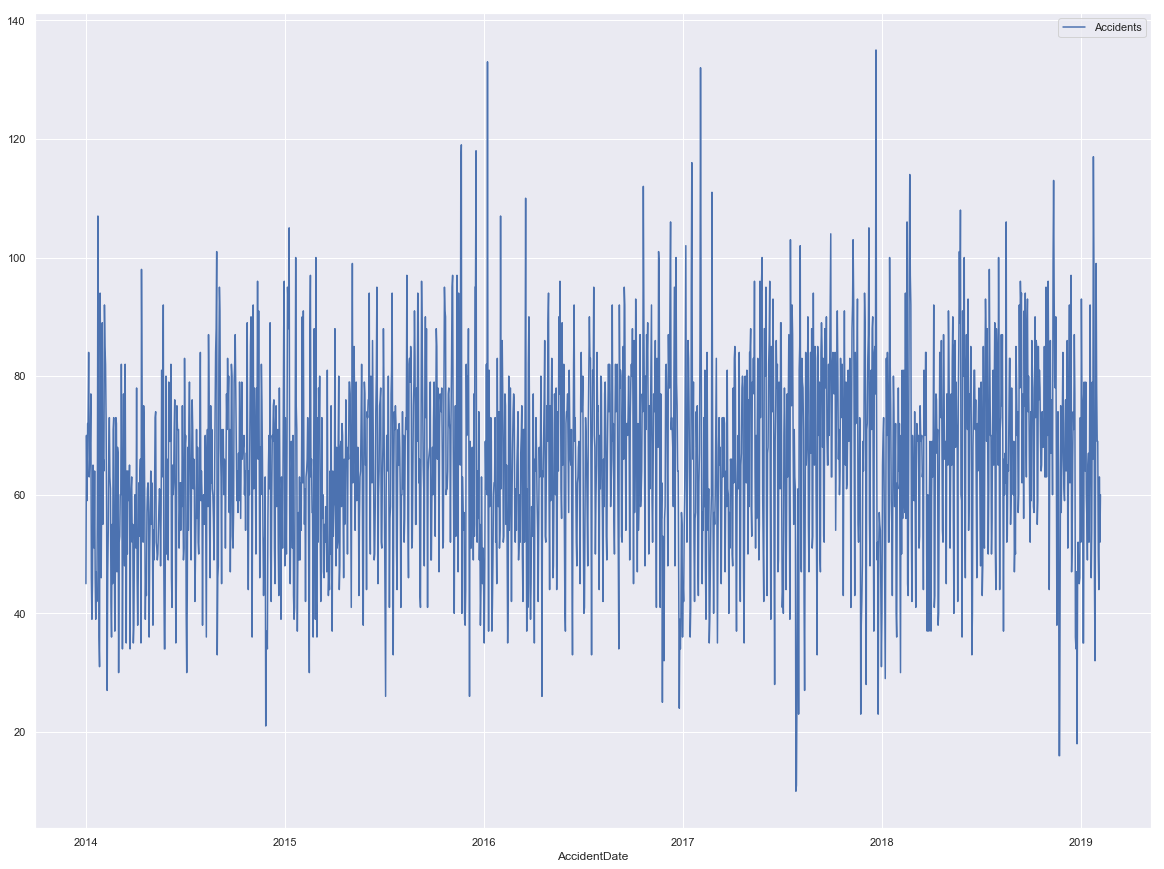

In [20]:
# Graph daily accident data

# set style 
sns.set(style='darkgrid')

# to increase the default size of the graphs
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20, 15

# plot daily accidents
ax=accidents_summary.plot()
plt.show()

In [21]:
# Summary statistics for the daily car accidents
accidents_summary.describe()

,Accidents
count,1863.000000
mean,65.746108
std,16.586442
min,10.000000
25%,54.000000
50%,66.000000
75%,77.000000
max,135.000000


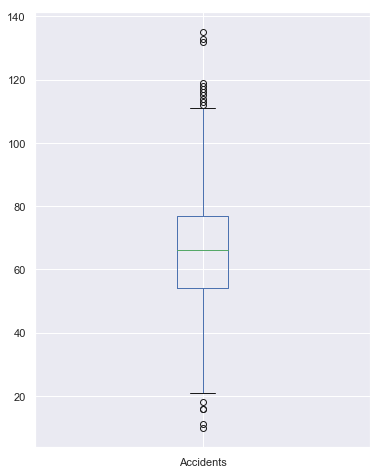

In [22]:
# Box plot for the daily accidents
rcParams['figure.figsize']=6, 8
accidents_summary.plot(kind='box')

### Annual accident data

In [23]:
# Extract year and month from the date
accidents_daily['Month']=accidents_daily['FIRST_OCCURENCE_DATE'].dt.month
accidents_daily['Year']=accidents_daily['FIRST_OCCURENCE_DATE'].dt.year

C:\Users\RodneyWeakly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RodneyWeakly\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# Check results
accidents_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122485 entries, 40144 to 164226
Data columns (total 22 columns):
OBJECTID_1                122485 non-null int64
INCIDENT_ID               122485 non-null int64
OFFENSE_ID                122485 non-null int64
OFFENSE_CODE              122485 non-null int64
OFFENSE_CODE_EXTENSION    122485 non-null int64
OFFENSE_TYPE_ID           122485 non-null object
OFFENSE_CATEGORY_ID       122485 non-null object
FIRST_OCCURENCE_DATE      122485 non-null datetime64[ns]
REPORTED_DATE             122485 non-null datetime64[ns]
INCIDENT_ADDRESS          122485 non-null object
GEO_X                     122485 non-null float64
GEO_Y                     122485 non-null float64
GEO_LON                   122485 non-null float64
GEO_LAT                   122485 non-null float64
DISTRICT_ID               122406 non-null float64
PRECINCT_ID               122406 non-null float64
NEIGHBORHOOD_ID           122485 non-null object
BICYCLE_IND               122485 no

In [25]:
# Yearly accident data
accidents_byyear=accidents_daily.groupby('Year')['OBJECTID_1'].count() 
accidents_byyear=accidents_byyear.to_frame(name='Accidents By Year')
accidents_byyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2014 to 2019
Data columns (total 1 columns):
Accidents By Year    6 non-null int64
dtypes: int64(1)
memory usage: 96.0 bytes


In [26]:
# Display accident statistic for the full years (2014-2018)
accidents_byyear.iloc[:5]

,Accidents By Year
Year,
2014,22444
2015,23842
2016,24254
2017,24617
2018,24899


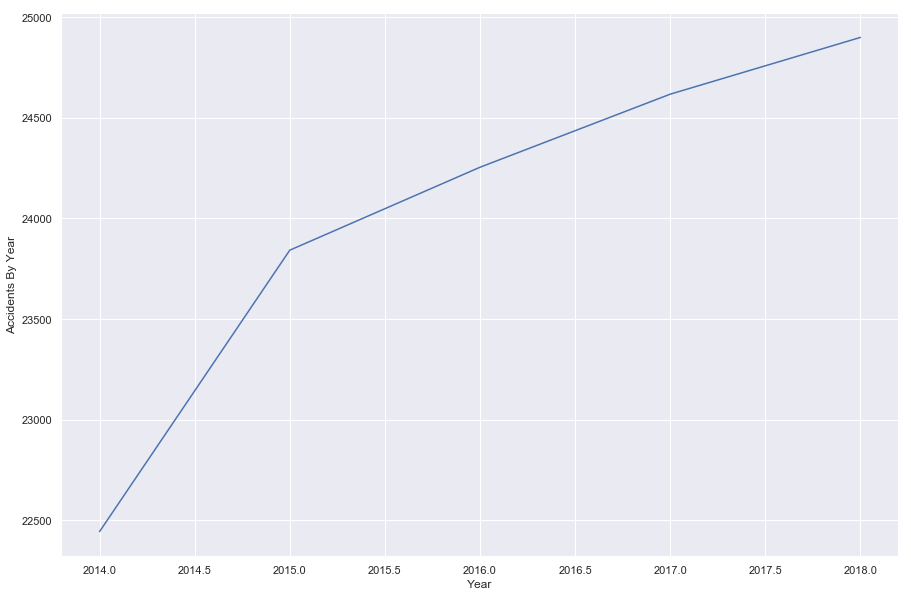

In [27]:
# Plot yearly car accidents 2014-2018
# Exclude 2019 since data available for one month only

rcParams['figure.figsize']= 15, 10
sns.lineplot(x=accidents_byyear.index[:5], y="Accidents By Year", data=accidents_byyear.iloc[:5])

In [28]:
# Summary statistics for yearly accidents
accidents_byyear.iloc[:5].describe()

,Accidents By Year
count,5.000000
mean,24011.200000
std,961.623471
min,22444.000000
25%,23842.000000
50%,24254.000000
75%,24617.000000
max,24899.000000


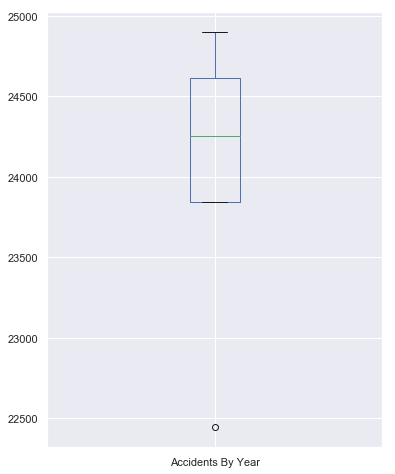

In [29]:
# Box plot for annual accidents
rcParams['figure.figsize']=6, 8
accidents_byyear.iloc[:5].plot(kind='box')

### Monthly Accidents Data

In [30]:
# Montly accident data
accidents_bymonth=pd.DataFrame()
accidents_bymonth['Number Of Accidents']=accidents_daily.groupby(['Year', 'Month'])['OBJECTID_1'].count()

In [31]:
# Check results
accidents_bymonth.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 62 entries, (2014, 1) to (2019, 2)
Data columns (total 1 columns):
Number Of Accidents    62 non-null int64
dtypes: int64(1)
memory usage: 881.0 bytes


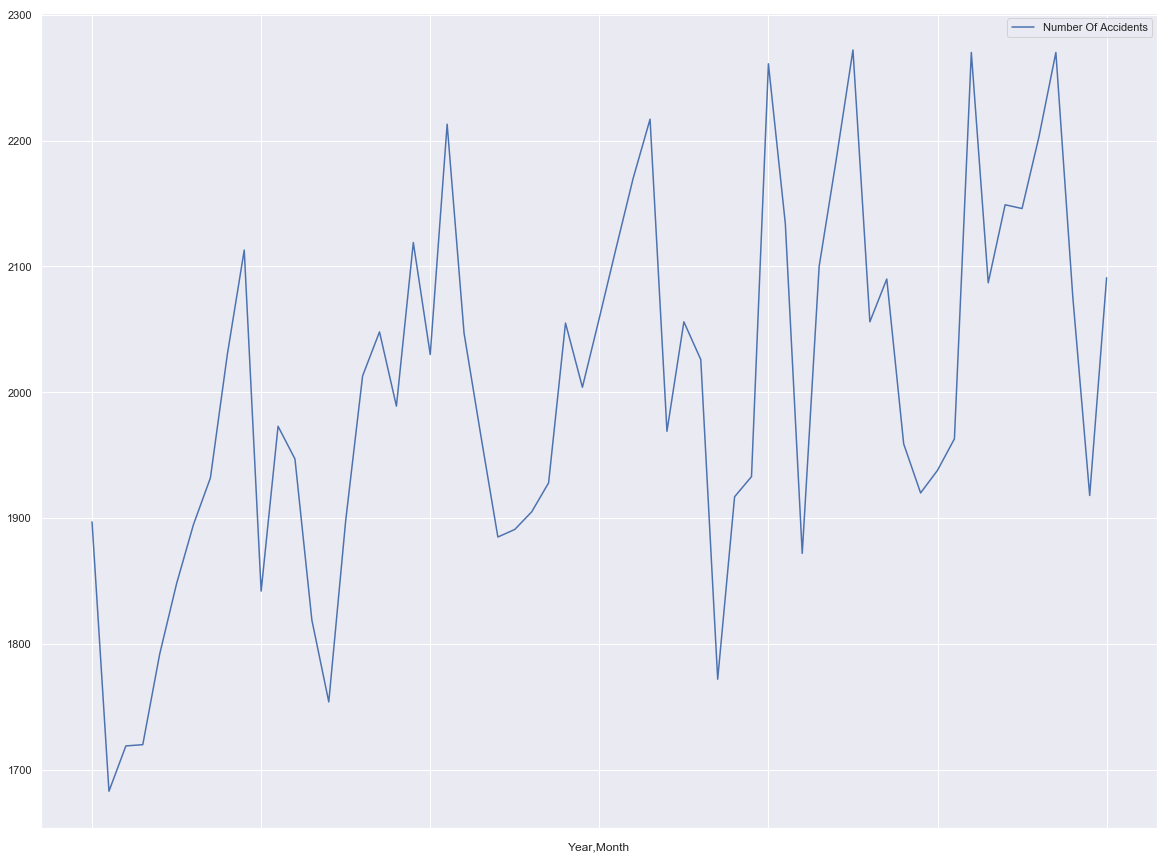

In [32]:
# Plot monthly car accidents January 2014- January 2019 
# Exclude February 2019 since data is incomplete
rcParams['figure.figsize']= 20, 15
ax=accidents_bymonth.iloc[:61].plot()
plt.show()

In [33]:
# Summary statistics for monthly accidents (excluding February 2019 because data is incomplete)
accidents_bymonth.iloc[:61].describe()

,Number Of Accidents
count,61.000000
mean,2002.409836
std,145.449003
min,1683.000000
25%,1905.000000
50%,2004.000000
75%,2100.000000
max,2272.000000


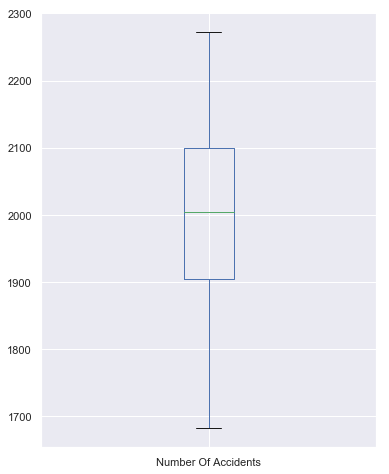

In [34]:
# Box plot for monthly accidents
rcParams['figure.figsize']=6, 8
accidents_bymonth.iloc[:61].plot(kind='box')

### Map accidents

In [35]:
# Map accidents for 2018 for demo purposes

# filter accidents by year 2018
accident_daily2018=accidents_daily[accidents_daily['Year']==2018][['OBJECTID_1', 'GEO_LON', 'GEO_LAT']]

In [36]:
import folium

Denver_Coordinates = (39.742043, -104.991531)
#create an empty map zoomed in on Denver
map=folium.Map(location=Denver_Coordinates, zoom_start=11)
fgv=folium.FeatureGroup(name='Car Accidents, 2018')
for i in range(0, len(accident_daily2018)):
    fgv.add_child(folium.CircleMarker(location=[accident_daily2018.iloc[i]['GEO_LAT'], accident_daily2018.iloc[i]['GEO_LON']], radius=2, color='red', fill=True, fill_color='red', fill_opacity=0.7))
map.add_child(fgv)
map.add_child(folium.LayerControl())
map.save("Accidents2018_1.html") # Save the map to a file

In [37]:
# Display the interactive map from the file created in the previous step
from IPython.display import HTML
HTML('<iframe src=Accidents2018_1.html width=1000 height=600></iframe>')

In [38]:
#Clusters
from folium.plugins import MarkerCluster
MarkerCluster()
#create an empty map zoomed in on Denver
map2=folium.Map(location=Denver_Coordinates, zoom_start=11)
clust=MarkerCluster().add_to(map2)                      

for i in range(0, len(accident_daily2018)):
    folium.Marker(location=[accident_daily2018.iloc[i]['GEO_LAT'], accident_daily2018.iloc[i]['GEO_LON']]).add_to(clust)
map2.save("Accidents2018_cluster.html") #Save the map to a file

In [39]:
# Retrieve the map from the file
from IPython.display import HTML
HTML('<iframe src=Accidents2018_cluster.html width=1000 height=600></iframe>')

In [40]:
# filter accidents - 2018 bicycle accident only 
accidents_bicycle2018=accidents_daily[accidents_daily['Year']==2018][accidents_daily['BICYCLE_IND']!=0][['OBJECTID_1', 'GEO_LON', 'GEO_LAT']]

C:\Users\RodneyWeakly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [41]:
accidents_bicycle2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 135200 to 163543
Data columns (total 3 columns):
OBJECTID_1    333 non-null int64
GEO_LON       333 non-null float64
GEO_LAT       333 non-null float64
dtypes: float64(2), int64(1)
memory usage: 10.4 KB


In [42]:
#2018 Bicycle Accidents Clusters
map3=folium.Map(location=Denver_Coordinates, zoom_start=11)
clust2=MarkerCluster().add_to(map3)                      

for i in range(0, len(accidents_bicycle2018)):
    folium.Marker(location=[accidents_bicycle2018.iloc[i]['GEO_LAT'], accidents_bicycle2018.iloc[i]['GEO_LON']]).add_to(clust2)
map3.save("Accidents2018_bicycle.html") 
from IPython.display import HTML
HTML('<iframe src=Accidents2018_bicycle.html width=1000 height=600></iframe>')

In [43]:
# filter accidents - 2018 pedestrian accident only 
accidents_pedestrian2018=accidents_daily[accidents_daily['Year']==2018][accidents_daily['PEDESTRIAN_IND']!=0][['OBJECTID_1', 'GEO_LON', 'GEO_LAT']]

C:\Users\RodneyWeakly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [44]:
accidents_pedestrian2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 135341 to 163812
Data columns (total 3 columns):
OBJECTID_1    558 non-null int64
GEO_LON       558 non-null float64
GEO_LAT       558 non-null float64
dtypes: float64(2), int64(1)
memory usage: 17.4 KB


In [45]:
# 2018 Pedestrian Accidents Clusters
map4=folium.Map(location=Denver_Coordinates, zoom_start=11)
clust3=MarkerCluster().add_to(map4)                      

for i in range(0, len(accidents_pedestrian2018)):
    folium.Marker(location=[accidents_pedestrian2018.iloc[i]['GEO_LAT'], accidents_pedestrian2018.iloc[i]['GEO_LON']]).add_to(clust3)
map4.save("Accidents2018_pedestrian.html")
from IPython.display import HTML
HTML('<iframe src=Accidents2018_pedestrian.html width=1000 height=600></iframe>')

In [46]:
# filter accidents - 2018 DUI 
accidents_DUI2018=accidents_daily[accidents_daily['Year']==2018][accidents_daily['OFFENSE_TYPE_ID']=='TRF-ACDT-DUI'][['OBJECTID_1', 'GEO_LON', 'GEO_LAT']]

C:\Users\RodneyWeakly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [47]:
accidents_DUI2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 135046 to 163867
Data columns (total 3 columns):
OBJECTID_1    698 non-null int64
GEO_LON       698 non-null float64
GEO_LAT       698 non-null float64
dtypes: float64(2), int64(1)
memory usage: 21.8 KB


In [48]:
# 2018 DUI Accidents Clusters
map5=folium.Map(location=Denver_Coordinates, zoom_start=11)
clust4=MarkerCluster().add_to(map5)                      

for i in range(0, len(accidents_DUI2018)):
    folium.Marker(location=[accidents_DUI2018.iloc[i]['GEO_LAT'], accidents_DUI2018.iloc[i]['GEO_LON']]).add_to(clust4)
map5.save("Accidents2018_DUI.html")
from IPython.display import HTML
HTML('<iframe src=Accidents2018_DUI.html width=1000 height=600></iframe>')

### Additional summary tables

In [49]:
# Montly accident data by incident type
accidents_daily.groupby(['Year', 'Month', 'OFFENSE_TYPE_ID'])['OFFENSE_TYPE_ID'].count()

Year  Month  OFFENSE_TYPE_ID
2014  1      TRAF-ACCIDENT-       48
             TRAF-HIT & RUN      454
             TRF-ACCIDENT       1336
             TRF-ACDT-DUI         59
      2      TRAF-ACCIDENT-       38
             TRAF-HIT & RUN      474
             TRF-ACCIDENT       1104
             TRF-ACDT-DUI         67
      3      TRAF-ACCIDENT-       49
             TRAF-HIT & RUN      423
             TRF-ACCIDENT       1172
             TRF-ACDT-DUI         75
      4      TRAF-ACCIDENT-       37
             TRAF-HIT & RUN      465
             TRF-ACCIDENT       1160
             TRF-ACDT-DUI         58
      5      TRAF-ACCIDENT-       35
             TRAF-HIT & RUN      459
             TRF-ACCIDENT       1235
             TRF-ACDT-DUI         63
      6      TRAF-ACCIDENT-       44
             TRAF-HIT & RUN      466
             TRF-ACCIDENT       1277
             TRF-ACDT-DUI         61
      7      TRAF-ACCIDENT-       49
             TRAF-HIT & RUN      488
         

In [50]:
# Yearly accident data by offense type
accidents_daily.groupby(['OFFENSE_TYPE_ID', 'Year'])['OFFENSE_TYPE_ID'].count() 

OFFENSE_TYPE_ID  Year
TRAF-ACCIDENT-   2014      578
                 2015      624
                 2016      642
                 2017      617
                 2018      648
                 2019       70
TRAF-HIT & RUN   2014     5577
                 2015     5933
                 2016     6444
                 2017     6809
                 2018     6859
                 2019      663
TRF-ACCIDENT     2014    15474
                 2015    16506
                 2016    16476
                 2017    16583
                 2018    16694
                 2019     1644
TRF-ACDT-DUI     2014      815
                 2015      779
                 2016      692
                 2017      608
                 2018      698
                 2019       52
Name: OFFENSE_TYPE_ID, dtype: int64

In [51]:
# Yearly accident data by neighborhood 
accidents_daily.groupby(['Year', 'NEIGHBORHOOD_ID'])['OFFENSE_TYPE_ID'].count()

Year  NEIGHBORHOOD_ID             
2014  Athmar Park                      255
      Auraria                          175
      Baker                           1219
      Barnum                           260
      Barnum West                      137
      Bear Valley                       93
      Belcaro                          228
      Berkeley                         228
      CBD                              487
      Capitol Hill                     690
      Chaffee Park                      93
      Cheesman Park                    298
      Cherry Creek                     408
      City Park                        142
      City Park West                   212
      Civic Center                     326
      Clayton                           99
      Cole                              79
      College View - South Platte      211
      Congress Park                    452
      Cory - Merrill                   139
      Country Club                      74
      DIA          

In [52]:
#Yearly bicycle accident data by neighborhood 
accidents_daily.groupby(['BICYCLE_IND','Year', 'NEIGHBORHOOD_ID'])['OFFENSE_TYPE_ID'].count()

BICYCLE_IND  Year  NEIGHBORHOOD_ID             
0            2014  Athmar Park                      252
                   Auraria                          173
                   Baker                           1206
                   Barnum                           256
                   Barnum West                      136
                   Bear Valley                       93
                   Belcaro                          224
                   Berkeley                         227
                   CBD                              469
                   Capitol Hill                     665
                   Chaffee Park                      93
                   Cheesman Park                    287
                   Cherry Creek                     405
                   City Park                        140
                   City Park West                   205
                   Civic Center                     313
                   Clayton                           99


In [53]:
# Yearly pedestrian accidents by neigborhood
accidents_daily.groupby(['PEDESTRIAN_IND','Year', 'NEIGHBORHOOD_ID'])['OBJECTID_1'].count()

PEDESTRIAN_IND  Year  NEIGHBORHOOD_ID             
0               2014  Athmar Park                      247
                      Auraria                          166
                      Baker                           1207
                      Barnum                           260
                      Barnum West                      133
                      Bear Valley                       92
                      Belcaro                          222
                      Berkeley                         221
                      CBD                              464
                      Capitol Hill                     671
                      Chaffee Park                      90
                      Cheesman Park                    282
                      Cherry Creek                     396
                      City Park                        140
                      City Park West                   208
                      Civic Center                     313
     

### File output

In [54]:
# Output monthly car accident data to a file for future use
accidents_bymonth.to_csv('monthlyaccidents.csv', date_format='%Y-%m-%d %H:%M:%S')